<a href="https://colab.research.google.com/github/venkateshblks/DataScience-practice/blob/main/Logistic_Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
# from google.colab import files
# uploaded = files.upload()
claimants = pd.read_csv("claimants.csv")
claimants.head(20)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


In [ ]:
claimants[claimants["CLMAGE"]<18]

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
2,66,1,0.0,1.0,0.0,5.0,0.330
6,10,0,0.0,1.0,0.0,9.0,3.538
12,150,1,0.0,1.0,0.0,7.0,1.678
15,171,1,1.0,0.0,0.0,9.0,0.053
18,376,1,0.0,1.0,0.0,3.0,0.000
...,...,...,...,...,...,...,...
1328,34055,0,0.0,1.0,0.0,14.0,0.400
1331,34030,0,1.0,1.0,0.0,3.0,0.950
1332,34066,1,1.0,1.0,0.0,9.0,0.000
1334,34104,1,1.0,1.0,0.0,16.0,0.060


In [ ]:
claimants.shape

(1340, 7)

In [ ]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
len(claimants['CASENUM'].unique())

1283

In [ ]:
# dropping the case number columns as it is not required
claimants.drop(["CASENUM"],inplace=True, axis =1)

In [ ]:
#Shape of the data set
claimants.shape

(1340, 6)

In [ ]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [ ]:

# df['column_name'] = df['column_name'].astype(float)

In [ ]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
# Removing NA values in data set
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [ ]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
claimants["ATTORNEY"].value_counts()

0    578
1    518
Name: ATTORNEY, dtype: int64

In [ ]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
# Dividing our data into input and output variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]


In [ ]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

LogisticRegression()

In [ ]:
# save the model to disk
import pickle
filename = 'Logistic_Model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Predict for X dataset
# pickle.load(open(filename, 'rb'))
pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('Logistic_Model.sav')

LogisticRegression()

In [ ]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier.predict(X)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})

In [ ]:
y_pred_df

,actual,predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
y_pred_df["predicted"].value_counts()

1    592
0    504
Name: predicted, dtype: int64

In [ ]:
#Classification report
## Precision – What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch?
## F1 score – What percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [ ]:
# intercept value
classifier.intercept_

array([-0.17361679])

In [ ]:
# Other coeffieicents
classifier.coef_

array([[ 0.42687928,  0.57068784, -0.59439873,  0.00653888, -0.38424791]])

In [ ]:
# ROC Curve

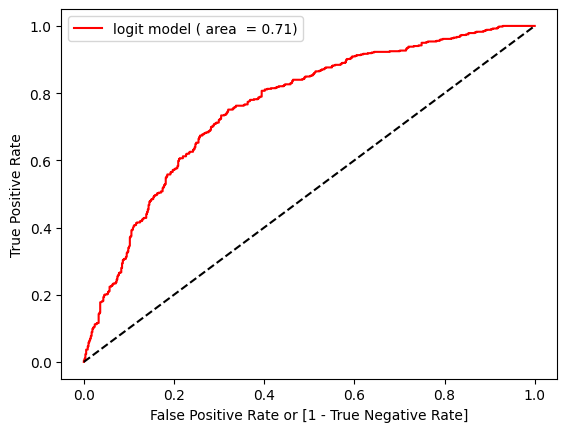

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
auc

0.7108589063606365

In [ ]:
import statsmodels.api as sm

In [ ]:
model1 =  sm.Logit(Y,X)
model1.fit().summary()


Optimization terminated successfully.
         Current function value: 0.587825
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1096
Model:                          Logit   Df Residuals:                     1091
Method:                           MLE   Df Model:                            4
Date:                Fri, 22 Mar 2024   Pseudo R-squ.:                  0.1501
Time:                        05:14:24   Log-Likelihood:                -644.26
converged:                       True   LL-Null:                       -758.05
Covariance Type:            nonrobust   LLR p-value:                 4.379e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.4040      0.131      3.086      0.002       0.147       0.661
CLMINSUR       0.4516      0.136      3.317      0.001       0.185       0.718
SEATBELT      -0.7980      0.566     -1.411      0.158      -1.907       0.311
CLMAGE         0.0057      0.003      1.792      0.073      -0.001       0.012
LOSS          -0.3900      0.034    -11.349      0.000      -0.457      -0.323
==============================================================================
"""